**Бербер Кирилл, 317 группа, задание 3**


(некоторые части кода были взяты с https://scikit-learn.org/)

(максимальная оценка 10 +0.5 доп баллов)

## О задании ##
В этом задании вы:

* настроите метод опорных векторов, визуализируете опорные вектора
* познакомитесь с калибровочными кривыми и сравните вероятности, выдаваемые логистической регрессией и методом опорных векторов
* изучите методы работы с категориальными переменными
* в качестве бонуса попробуете библиотеку vowpal wabbit.

In [1]:
%pylab inline
import pandas as pd

from sklearn.datasets import load_diabetes, make_classification
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


## Часть 1. Линейная регрессия



В этой части мы кратко познакомимся с линейной регрессией.

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3.

In [4]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

In [5]:
X_train.shape

(309, 10)

In [6]:
#data

**Задание 1.** Обучение линейной регрессии.

**(1 балл)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов (веса, они же составляют вектор w) близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

Замечания:

- Используйте модели из sklearn

- Можно строить графики с учетом $w_0$ (bias), можно без **(обязательно поясните, как в итоге строили)**, однако стоит учитывать, что $w_0 \approx 0$ несет другой смысл, нежели чем $w_i \approx 0$.

- Перебор по логарифмической сетке от $10^{-3}$ до $10^{3}$ подразумевает **равномерный перебор по степеням**: $10^{-3}, 10^{-2}, 10^{-1}, 10^{0}$ итд. Однако ничего не мешает (и не будет лишним) сделать и более частую равномерную сетку, если позволяет время вычислений. Менее частую сетку лучше делать в тех случаях, когда вычисления совсем запредельные по времени, однако помните, что делание выводов о какой-либо зависимости по 3-4 точкам может привести к ошибочным результатам **(и такое будет засчитываться как ошибка, если не пояснено, почему нельзя было сделать больше точек)**

In [18]:
from sklearn import linear_model
L1_lasso = linear_model.Lasso()
L1_lasso.fit(X_train, y_train)

Lasso()

In [19]:
from sklearn.linear_model import Ridge
L2_rigde = Ridge()
L2_rigde.fit(X_train, y_train)

Ridge()

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
L1_lasso.coef_

array([  0.        ,   0.        , 274.32681397,  48.58596734,
         0.        ,   0.        ,  -0.        ,   0.        ,
       424.11801795,   0.        ])

In [11]:
len(L1_lasso.coef_[L1_lasso.coef_ <= (L1_lasso.coef_).mean() / 5 ])

7

In [12]:
#abs(L2_rigde.coef_).mean()/5

In [13]:
#L2_rigde.coef_[abs(L2_rigde.coef_) <= (abs(L2_rigde.coef_).mean() / 5) ]

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

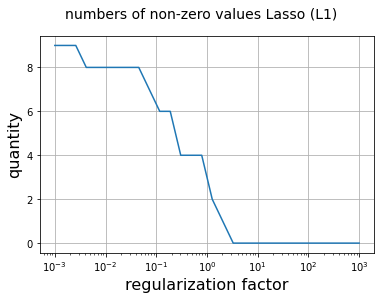

In [15]:
fig, ax = plt.subplots()
alphas = np.logspace(-3, 3, 30)
numbL = []
for i in range(30):
    L1_lasso = linear_model.Lasso(alpha=alphas[i])
    L1_lasso.fit(X_train, y_train)
    #print(i, L1_lasso.coef_[abs(L1_lasso.coef_) < (abs(L1_lasso.coef_).mean() / 5) ], abs(L1_lasso.coef_).mean() / 5)
    numbL += [10 - len(L1_lasso.coef_[abs(L1_lasso.coef_) <= (abs(L1_lasso.coef_).mean() / 5) ])]
#numbL
fig.suptitle('numbers of non-zero values Lasso (L1)', fontsize= 14)
ax.plot(alphas, numbL)
ax.set_ylabel('quantity', size = 16)
ax.set_xlabel('regularization factor', size = 16)
plt.xscale("log")
ax.grid()
plt.show()

L1 регуляяризатор отбирает признаки, что видно из графика

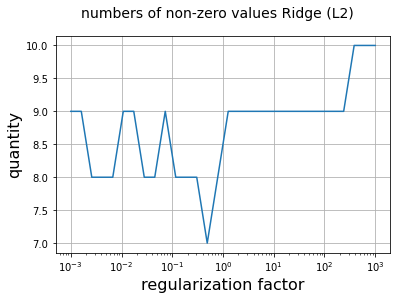

In [16]:
fig, ax = plt.subplots()

alphas = np.logspace(-3, 3, 30)
numbR = []
for i in range(30):
    L2_rigde = Ridge(alpha=alphas[i])
    L2_rigde.fit(X_train, y_train)
    #print(i, L2_rigde.coef_[abs(L2_rigde.coef_) < (abs(L2_rigde.coef_).mean() / 5) ], abs(L2_rigde.coef_).mean() / 5)
    numbR += [10 - len(L2_rigde.coef_[abs(L2_rigde.coef_) <= (abs(L2_rigde.coef_).mean() / 5) ])]
#numbR
fig.suptitle('numbers of non-zero values Ridge (L2)', fontsize= 14)
ax.set_ylabel('quantity', size = 16)
ax.set_xlabel('regularization factor', size = 16)
ax.plot(alphas, numbR)
ax.grid()
plt.xscale("log")
plt.show()

L2 регуляризатор не занулил ни одного признака, в отличие от L1

In [17]:
y_train.shape

(309,)


Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.



In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score

L2_rigde = Ridge()
L2_rigde.fit(X_train, y_train)
s = L2_rigde.predict(X_test)
first_rmse = np.sqrt(mean_squared_error(y_test, s))
first_mae = mean_absolute_error(y_test, s)
first_r_2 = r2_score(y_test, s)
print('RMSE -', np.sqrt(mean_squared_error(y_test, s)))
print('MAE -', mean_absolute_error(y_test, s))
print('R_2 -', r2_score(y_test, s))

RMSE - 58.304415127748044
MAE - 49.602846072752996
R_2 - 0.3598993868368464


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Для этого воспользуйтесь GridSearchCV и KFold из sklearn.

In [3]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [20]:
kf = KFold(n_splits=3)
i = 0
alpha_rmse = []
alpha_mae = []
alpha_r_2 = []
for train_index, test_index in kf.split(X_train):
    X_train_small, X_test_small = X_train[train_index], X_train[test_index]
    y_train_small, y_test_small = y_train[train_index], y_train[test_index]
    parametrs = { 'alpha': np.logspace(-3, 3, 30)}
    grid_rmse  = GridSearchCV(Ridge(),  parametrs, scoring = 'neg_mean_squared_error', cv = 3)
    grid_rmse.fit(X_train_small, y_train_small)
    alpha_rmse += [grid_rmse.best_params_['alpha']]
    print('best_alpha_rmse fold', i, '-', grid_rmse.best_params_['alpha'])
    grid_rmse  = GridSearchCV(Ridge(),  parametrs, scoring = 'neg_mean_absolute_error', cv = 3)
    grid_rmse.fit(X_train_small, y_train_small)
    alpha_mae += [grid_rmse.best_params_['alpha']]
    print('best_alpha_mae fold', i, '-', grid_rmse.best_params_['alpha'])
    grid_rmse  = GridSearchCV(Ridge(),  parametrs, scoring = 'r2', cv = 3)
    grid_rmse.fit(X_train_small, y_train_small)
    alpha_r_2 += [grid_rmse.best_params_['alpha']]
    print('best_alpha_R_2 fold', i, '-', grid_rmse.best_params_['alpha'])
    i += 1

best_alpha_rmse fold 0 - 0.02807216203941177
best_alpha_mae fold 0 - 0.017433288221999882
best_alpha_R_2 fold 0 - 0.04520353656360243
best_alpha_rmse fold 1 - 0.04520353656360243
best_alpha_mae fold 1 - 0.04520353656360243
best_alpha_R_2 fold 1 - 0.04520353656360243
best_alpha_rmse fold 2 - 0.0016102620275609393
best_alpha_mae fold 2 - 0.001
best_alpha_R_2 fold 2 - 0.0016102620275609393


In [21]:
print('rmse', alpha_rmse)
print('mae', alpha_mae)
print('r_2', alpha_r_2)

rmse [0.02807216203941177, 0.04520353656360243, 0.0016102620275609393]
mae [0.017433288221999882, 0.04520353656360243, 0.001]
r_2 [0.04520353656360243, 0.04520353656360243, 0.0016102620275609393]


такие best_alpha получились для каждого из фолдов

**Постройте графики зависимости фукнции потерь от коэффициента регуляризации.**

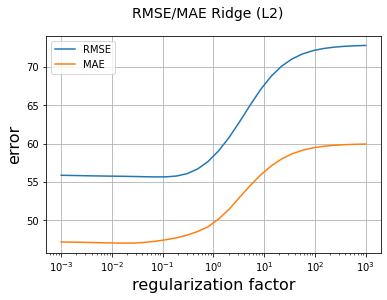

In [22]:
fig, ax = plt.subplots()

alphas = np.logspace(-3, 3, 30)
numbRMSE = []
numbMAE = []
numbR_2 = []

for i in range(30):
    L2_rigde = Ridge(alpha=alphas[i])
    L2_rigde.fit(X_train, y_train)
    s_ridge = L2_rigde.predict(X_test)
    numbRMSE += [np.sqrt(mean_squared_error(y_test, s_ridge))]
    numbMAE +=  [mean_absolute_error(y_test, s_ridge)]
#numbR
fig.suptitle('RMSE/MAE Ridge (L2)', fontsize= 14)
ax.set_ylabel('error', size = 16)
ax.set_xlabel('regularization factor', size = 16)
ax.plot(alphas, numbRMSE, label ='RMSE')
ax.plot(alphas, numbMAE,  label ='MAE')
ax.legend()
ax.grid()
plt.xscale("log")
plt.show()

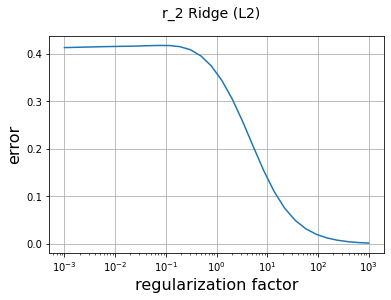

In [23]:
fig, ax = plt.subplots()

alphas = np.logspace(-3, 3, 30)
numbRMSE = []
numbMAE = []
numbR_2 = []

for i in range(30):
    L2_rigde = Ridge(alpha=alphas[i])
    L2_rigde.fit(X_train, y_train)
    s_ridge = L2_rigde.predict(X_test)
    numbR_2 += [r2_score(y_test, s_ridge)]
#numbR
fig.suptitle('r_2 Ridge (L2)', fontsize= 14)
ax.set_ylabel('error', size = 16)
ax.set_xlabel('regularization factor', size = 16)
ax.plot(alphas, numbR_2, label ='R_2')
ax.grid()
plt.xscale("log")
plt.show()

**Посчитайте те же метрики снова. Заметно ли изменилось качество?**

первоначальные результаты были:

In [24]:
print('rmse -', first_rmse)
print('mae -', first_mae)
print('r_2 -', first_r_2)

rmse - 58.304415127748044
mae - 49.602846072752996
r_2 - 0.3598993868368464


In [24]:
L2_rigde = Ridge(alpha_rmse[0])
L2_rigde.fit(X_train, y_train)
s = L2_rigde.predict(X_test)
print('RMSE -', np.sqrt(mean_squared_error(y_test, s)))
L2_rigde = Ridge(alpha_mae[0])
L2_rigde.fit(X_train, y_train)
s = L2_rigde.predict(X_test)
print('MAE -', mean_absolute_error(y_test, s))
L2_rigde = Ridge(alpha_r_2[0])
L2_rigde.fit(X_train, y_train)
s = L2_rigde.predict(X_test)
print('R_2 -', r2_score(y_test, s))

RMSE - 55.69897626553994
MAE - 47.00392106826361
R_2 - 0.41646595402733577


**Видно, что показатели RMSE и MAE упали, что говорит об улучшении качества. R_2 увеличилась, score увеличился.**

**Задание 2.** Поиск объектов-выбросов

**(0.5 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

In [4]:
from sklearn.model_selection import cross_val_predict

In [26]:
MSERigde = Ridge(alpha_rmse[0])
MSEy_pred = cross_val_predict(MSERigde, X_train, y_train, cv=3)
print('MSE -', mean_squared_error(y_train, MSEy_pred))

MSE - 3051.219261608868


In [27]:
diff = []
for i in range (len(y_train)):
    diff += [(y_train[i] - MSEy_pred[i])**2]

In [28]:
diff = np.array(diff)

In [29]:
len(diff)

309

In [5]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

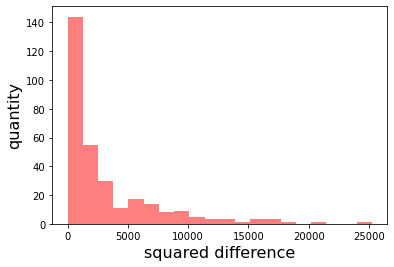

In [30]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

num_bins = 20
n, bins, patches = plt.hist(diff, num_bins, facecolor='red', alpha=0.5)
ax.set_ylabel('error', size = 16)
plt.xlabel('squared difference', size = 16)
plt.ylabel('quantity', size = 16)

#plt.xscale("log")
plt.show()

Посмотрим поближе на хвосты

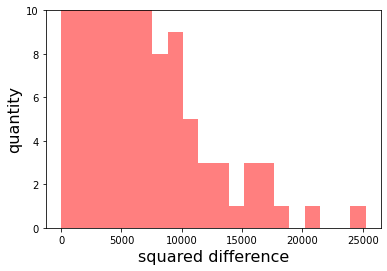

In [31]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

num_bins = 20
n, bins, patches = plt.hist(diff, num_bins, facecolor='red', alpha=0.5)
ax.set_ylabel('error', size = 16)
plt.xlabel('squared difference', size = 16)
plt.ylabel('quantity', size = 16)
plt.ylim(0, 10)
#plt.xscale("log")
plt.show()

из гистограммы мы видим, что выбросов со значениями больше 20000 - два

**Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной (или, называемой валидационной) (X_test, y_test) выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?**

In [32]:
X_cut_train = X_train[(diff < 20000)]

In [33]:
y_cut_train = y_train[(diff < 20000)]

In [34]:
L2_rigde_cut = Ridge(alpha_rmse[0])
L2_rigde_cut.fit(X_cut_train, y_cut_train)
s = L2_rigde.predict(X_test)
print('RMSE -', np.sqrt(mean_squared_error(y_test, s)))
L2_rigde_cut = Ridge(alpha_mae[0])
L2_rigde_cut.fit(X_cut_train, y_cut_train)
s = L2_rigde.predict(X_test)
print('MAE -', mean_absolute_error(y_test, s))
L2_rigde_cut = Ridge(alpha_r_2[0])
L2_rigde_cut.fit(X_cut_train, y_cut_train)
s = L2_rigde.predict(X_test)
print('R_2 -', r2_score(y_test, s))

RMSE - 55.668615636765914
MAE - 47.10820107701615
R_2 - 0.41646595402733577


напомним, какие значения были

In [35]:
L2_rigde = Ridge(alpha_rmse[0])
L2_rigde.fit(X_train, y_train)
s = L2_rigde.predict(X_test)
print('RMSE -', np.sqrt(mean_squared_error(y_test, s)))
L2_rigde = Ridge(alpha_mae[0])
L2_rigde.fit(X_train, y_train)
s = L2_rigde.predict(X_test)
print('MAE -', mean_absolute_error(y_test, s))
L2_rigde = Ridge(alpha_r_2[0])
L2_rigde.fit(X_train, y_train)
s = L2_rigde.predict(X_test)
print('R_2 -', r2_score(y_test, s))

RMSE - 55.69897626553994
MAE - 47.00392106826361
R_2 - 0.41646595402733577


**Видно, что точность не улучшилась, а, наоборот, упала** 

это может быть связано с тем, что мы удалили выбросы из обучающей выборки, а в тестовой выборки мы их убрать никак не можем. Скорее всего они есть и там и из-за этого страдает качество предсказаний

## Часть 2. Метод опорных векторов и калибровка вероятностней


Сгенерируем синтетические данные.



In [25]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

**Задание 1.** Обучение и применение метода опорных векторов.

**(1 балл)**

Обучите метод опорных векторов. На занятиях мы проходили обычный вариант, что соответствует линейному ядру (LinearSVC/LinearSVR в scikit-learn).

In [26]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm, datasets
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.LinearSVC(random_state=0, tol=1e-5))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

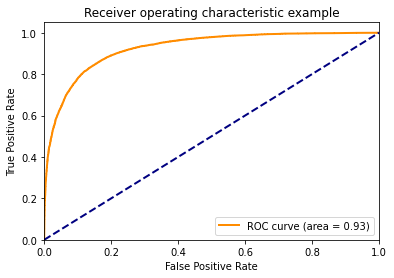

In [27]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

здесь мы посчитали ROC-AUC (0.93)



In [28]:
from sklearn import svm, datasets

classifier = svm.LinearSVC()
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

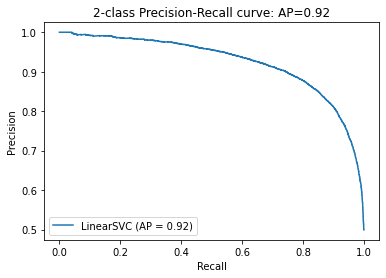

In [40]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
plt.show()


В названии метода присутствуют некоторые "опорные векторы". Сгенерируйте синтетический датасет с помощью make_classification с 2 признаками (хотя бы 100 объектов, но желательно больше), обучите на нём метод опорных векторов. Визуализируйте разделяющую прямую, все объекты и выделите опорные вектора (атрибут support_vectors_). В этот раз вместо LinearSVC воспользуйтесь SVC с линейным ядром (kernel='linear'), так как только в нём есть информация об опорных векторах.

**Замечания:**

- Графики должны быть оформлены правильно, в соответствии с теми требованиями, которые были в первой лабороторной. Так же опорные вектора следует рисовать не другим цветом, а другой **меткой** (например, крестик), иначе теряется принадлежность к классу. Точки из разных классов рисуйте **разными цветами** (или разными фигурами). Если необходимо, можно вводить альфа-канал (степень прозрачности) для улучшения восприятия. Можно (и очень рекомендуется) рисовать не только разделяющую прямую, но из "разделяющую полосу" вокруг прямой.


- Обязательно **пишите легенду**, поясняющую что изображено на полотне.

In [721]:
X, y = make_classification(
    n_samples=330, n_features=2, n_informative=2, n_redundant=0,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [722]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm, datasets
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Learn to predict each class against the other
classifier = svm.SVC(random_state = 0, tol = 1e-5, kernel = 'linear')
y_score = classifier.fit(X, y).decision_function(X_test)

In [723]:
supp = classifier.support_

In [724]:
supp

array([  2,  12,  26,  53,  57,  59,  60,  62,  69,  70,  72,  73,  74,
        81,  94,  95, 125, 133, 149, 156, 171, 179, 198, 221, 237, 244,
       255, 257, 263, 268, 276, 283, 287, 297, 308, 328,   3,   9,  14,
        33,  42,  78,  90,  97, 124, 129, 148, 163, 184, 185, 200, 202,
       210, 212, 215, 219, 223, 224, 247, 249, 251, 253, 260, 270, 274,
       290, 310, 313, 316, 317, 326])

In [725]:
#y_train

In [726]:
y[supp]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [727]:
supp_1 = supp[y[supp] == 1]

In [732]:
supp_2 = supp[y[supp] == 0]

In [735]:
classifier.coef_

array([[-0.32260321,  2.34869659]])

In [736]:
classifier.coef_[0][1]

2.348696592432553

In [737]:
#x1*classifier.coef_[0][0] + x2*classifier.coef_[0][1] = 0

In [738]:
AA = [-3, 3]
BB = [3 *classifier.coef_[0][0] / classifier.coef_[0][1], -3 *classifier.coef_[0][0] / classifier.coef_[0][1]]

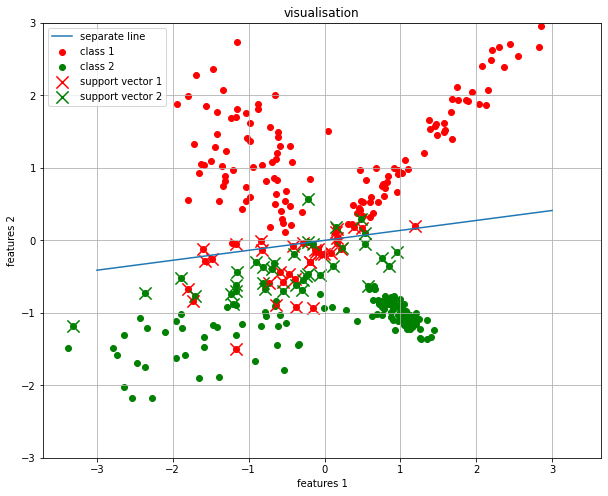

In [739]:
#fig = plt.subplots()
plt.figure(figsize = (10, 8))
plt.scatter(X[np.where(y == 1)][:,0], X[np.where(y == 1)][:,1], c = 'r', label = 'class 1')
plt.scatter(X[np.where(y == 0)][:,0], X[np.where(y == 0)][:,1], c = 'g', label = 'class 2')
#ax.set_facecolor('black')
plt.plot(AA, BB, label = 'separate line')
plt.xlabel('features 1')
plt.ylabel('features 2')
plt.title('visualisation')
plt.scatter(X[supp_1][:, 0], X[supp_1][:,1], c = 'r', marker = 'x',s = 150, label = 'support vector 1')
plt.scatter(X[supp_2][:, 0], X[supp_2][:,1], c = 'g', marker = 'x', s = 150,  label = 'support vector 2')
plt.ylim(-3, 3)
plt.grid()
plt.legend()
plt.show()

разделяющая прямая проходит разумно


**Задание 2.** Калибровка вероятностей.

**(1.5 балла)**

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых.

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

In [768]:
def plot_calibration_curve(y_test,preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 10
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2)
        bin_real_ratios.append(np.sum(y_test[((preds >= l) & (preds < r))] == 1) / (np.sum(y_test[((preds >= l) & (preds < r))] >= 0)))
        #print(l, len(y_test[((preds >= l) & (preds < r))]))
    bin_real_ratios = np.nan_to_num(bin_real_ratios, copy = False)
    #print(bin_real_ratios)
    plt.plot(bin_middle_points, bin_real_ratios)
    plt.grid()

Постройте калибровочные кривые для логистической регрессии и метода опорных векторов. Изучите распределение ответов классификаторов (постройте гистограммы с помощью plt.hist). Чем они различаются? Чем вы можете объяснить это?

Заметим, что метод опорных векторов не умеет predict_proba, но имеет метод decision_function.

In [783]:
X, y = make_classification(
    n_samples=10000, n_features=2, n_informative=2, n_redundant=0,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [784]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm, datasets
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Learn to predict each class against the other
classifier = svm.SVC(random_state = 0, tol = 1e-5, kernel = 'linear')
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [785]:
y_pred = classifier.predict(X_test)

In [786]:
y_proba = 1 / (1 + np.exp(-1*y_score))

In [766]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_score)

0.9456320578279667

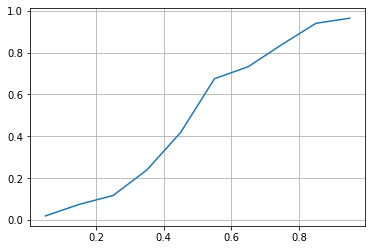

In [769]:
plot_calibration_curve(y_test,y_proba)

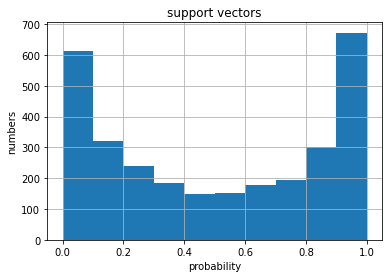

In [793]:
plt.hist(y_proba)
plt.xlabel('probability')
plt.ylabel('numbers')
plt.title('support vectors')
plt.grid()
plt.show()

In [770]:
part_2 = LogisticRegression(max_iter = 1000)

In [771]:
part_2.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [773]:
yl_pred = part_2.predict(X_test)

In [797]:
y_score = part_2.decision_function(X_test)

In [798]:
y_proba_22 = 1 / (1 + np.exp(-1*y_score))

In [779]:
y_proba_2 = part_2.predict_proba(X_test)

In [777]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_score)

0.9462773957503698

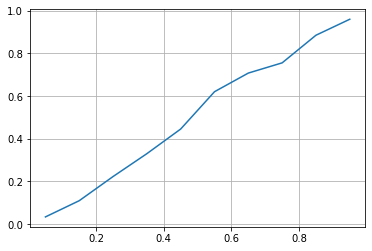

In [799]:
plot_calibration_curve(y_test,y_proba_22)

In [801]:
#plot_calibration_curve(y_test,y_proba_2[:,1])

у логистической регрессии калибровочная кривая более диагональная, результат лучше

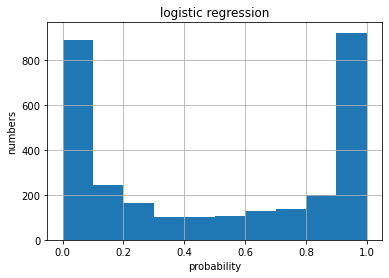

In [800]:
plt.hist(y_proba_22)
plt.xlabel('probability')
plt.ylabel('numbers')
plt.title('logistic regression')
plt.grid()
plt.show()

**видно, что логистическая регрессия более уверенно предсказывает целевую переменную, чем метод опорных векторов**

Воспользуйтесь CalibratedClassifierCV из sklearn для калибровки вероятностей метода опорных векторов на обучении и постройте с его помощью предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

In [803]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm, datasets
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV

# Learn to predict each class against the other
classifier = svm.SVC(random_state = 0, tol = 1e-5, kernel = 'linear')
classifier = CalibratedClassifierCV(classifier)
classifier.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=SVC(kernel='linear', random_state=0,
                                          tol=1e-05))

In [804]:
y_pred = classifier.predict(X_test)
y_proba = classifier.predict_proba(X_test)

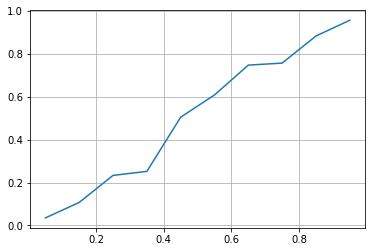

In [806]:
plot_calibration_curve(y_test,y_proba[:,1])

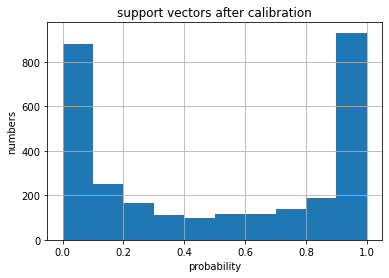

In [809]:
plt.hist(y_proba[:,1])
plt.xlabel('probability')
plt.ylabel('numbers')
plt.title('support vectors after calibration')
plt.grid()
plt.show()

после калибровки вероятностей метода опорных векторов калибровочная кривая стала лучше. она стала более диагональной и на гистограмме видно, что предсказания стали увереннее. 

она стала больше похожа на графики логичтической регрессии

## Часть 3. Логистическая регрессия.

**Задание 3.** Обучение логистической регрессии на реальных данных и оценка качества классификации.

**(0.5 балл)**

**Подготовка данных.**

Загрузим данные с конкурса Kaggle Porto Seguro’s Safe Driver Prediction (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом под нужды задания мы немного модифицируем датасет.

In [812]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

In [813]:
data.shape

(595212, 57)

Пересемплируем выборку так, чтобы положительных и отрицательных объектов в выборке было одинаковое число. Разделим на обучающую и тестовую выборки.

In [815]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

In [36]:
from sklearn.linear_model import LogisticRegression
my_log_r = LogisticRegression(max_iter = 1000)

In [36]:
my_log_r.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [48]:
y_log_pred = my_log_r.predict(X_test)

In [49]:
y_log_pred

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [45]:
y_score = my_log_r.decision_function(X_test)

In [51]:
1 / (1 + exp((-1)*y_score))

array([0.50971505, 0.68275656, 0.48392775, ..., 0.51538944, 0.62271665,
       0.39973806])

In [52]:
(np.sum(y_log_pred == y_test)) / len(y_test)

0.58832

это доля правильных предсказаний для логичстической регрессии. 

In [53]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 2
for i in range(n_classes+1):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

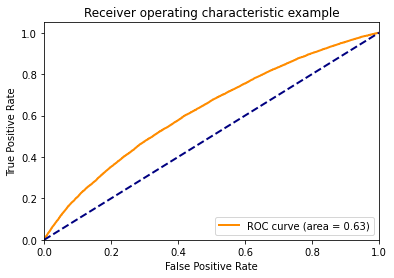

In [54]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [48]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_score)

0.6251428202020566

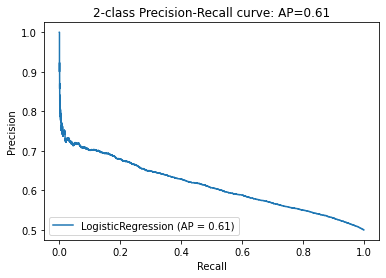

In [55]:
average_precision = average_precision_score(y_test, y_score)

disp = plot_precision_recall_curve(my_log_r, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
plt.show()

Какие наблюдения и выводы по ним можно сделать? 

Roc-кривая проходит выше диагонали, предсказания есть, но не отличаются сильной точностью. 
по Precision-Recall кривой можно заметить, что если мы хотим увеличить полноту, то это сильно сказывается на точности в самом начале. При высокой точности полнота минимальна и наоброт

**Задание 4.** Изучение влияния регуляризатора на процесс обучения

**(1 балл)**

Проверьте на практике, как влияет регуляризатор на процесс обучения (убывание функции потерь на обучающей и отложенной выборках). Чтобы считать функцию потерь на отложенной выборке после каждой итерации, можно воспользоваться параметром warm_start у sklearn.linear_model.LogisticRegression либо методом partial_fit sklearn.linear_model.SGDClassifier (параметр loss тогда должен быть равен log).

Замечание:

- Для каждого $\alpha$ своя функция на графике; функции можно отображать на одном полотне обязательно с легендой; если $\alpha$ слишком много и на одном полотне они выглядят грязно, то можно строить на нескольких, однако в этом случае рекомендуется приводить масштаб и деления (min, max значения) на оси $y$ к одним и тем же значениям --- так визуально будет очень просто сравнить графики и сделать выводы :)


- $\alpha$ желательно перебирать по логарифмической шкале (примерно как в первом задании), однако можно использовать информацию о том, что при некоторых значениях $\alpha$ модель не обучается хорошо и не исследовать их. Тут обязательно перебрать хотя бы 3 разных (степени в лог. шкале) $\alpha$, больше -- приветствуется.

In [836]:
alphas = np.logspace(-3, 3, 5)

In [830]:
from sklearn.metrics import log_loss
from sklearn.linear_model import SGDClassifier

In [843]:
test_alpha = []
train_alpha = []
for alp in alphas:
    cls = SGDClassifier(loss = 'log', alpha = alp)
    loss_tr = []
    loss_ts = []
    for i in range(200):
        cls.partial_fit(X_train, y_train, classes = np.array([0, 1]))
        loss_tr += [log_loss(y_train, cls.predict_proba(X_train))]
        loss_ts += [log_loss(y_test, cls.predict_proba(X_test))]
    test_alpha += [loss_ts]
    train_alpha += [loss_tr]

In [842]:
#test_alpha

In [835]:
alphas

array([1.e-03, 1.e-01, 1.e+01, 1.e+03])

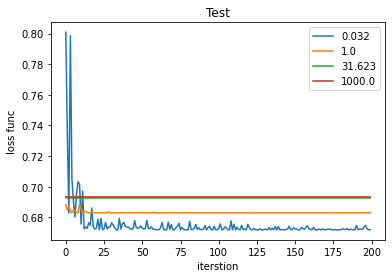

In [860]:
for i in range(1, len(alphas)):
    x = np.arange(200)
    y = test_alpha[i]
    plt.title('Test')
    plt.xlabel('iterstion')
    plt.ylabel('loss func')
    plt.plot(x, y, label = float('{:.3f}'.format(alphas[i])))
    plt.legend()
plt.show()

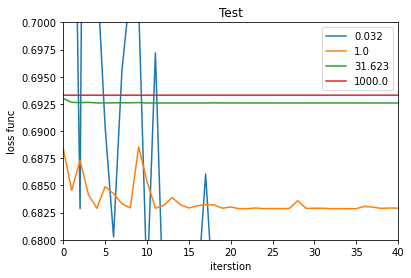

In [863]:
for i in range(1, len(alphas)):
    x = np.arange(200)
    y = test_alpha[i]
    plt.title('Test')
    plt.xlabel('iterstion')
    plt.ylabel('loss func')
    plt.ylim(0.68, 0.7)
    plt.xlim(0, 40)
    plt.plot(x, y, label = float('{:.3f}'.format(alphas[i])))
    plt.legend()
plt.show()

приблизили тот же самый график

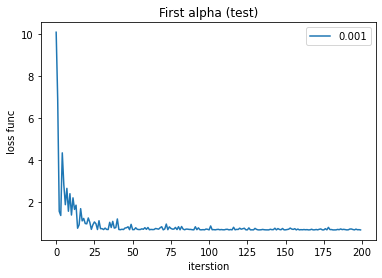

In [864]:
x = np.arange(200)
y = test_alpha[0]
plt.title('First alpha (test)')
plt.xlabel('iterstion')
plt.ylabel('loss func')
plt.plot(x, y, label = float('{:.3f}'.format(alphas[0])))
plt.legend()
plt.show()

Выведем графики теперь для Train

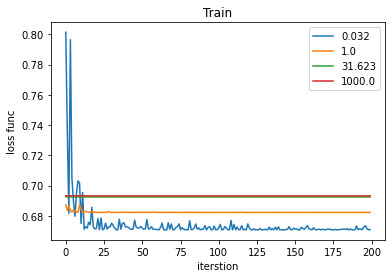

In [865]:
for i in range(1, len(alphas)):
    x = np.arange(200)
    y = train_alpha[i]
    plt.title('Train')
    plt.xlabel('iterstion')
    plt.ylabel('loss func')
    plt.plot(x, y, label = float('{:.3f}'.format(alphas[i])))
    plt.legend()
plt.show()

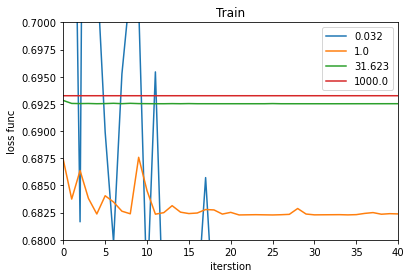

In [866]:
for i in range(1, len(alphas)):
    x = np.arange(200)
    y = train_alpha[i]
    plt.title('Train')
    plt.xlabel('iterstion')
    plt.ylabel('loss func')
    plt.ylim(0.68, 0.7)
    plt.xlim(0, 40)
    plt.plot(x, y, label = float('{:.3f}'.format(alphas[i])))
    plt.legend()
plt.show()

приблизили тот же график

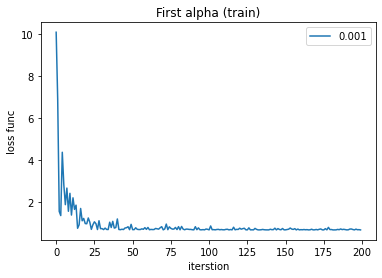

In [868]:
x = np.arange(200)
y = train_alpha[0]
plt.title('First alpha (train)')
plt.xlabel('iterstion')
plt.ylabel('loss func')
plt.plot(x, y, label = float('{:.3f}'.format(alphas[0])))
plt.legend()
plt.show()

отдельно вывели для самого первого значения альфа, потому что на одном графике он на порядок больше остальных

видно, что на первых итерациях функция потерь ведет себя нестабильно, но даже на самых маленьких значениях альфа сходится

 Стоит отметить, при очень больших значениях коэффициент регуляризации  зануляет веса и функция потерь становится константой

## Часть 4. Работа с категориальными переменными

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:

- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:$$
b_i(x) = [f_j(x) = c_i]
$$

В этой части работаем с датасетом из предыдущей части.


**Задание 5.** Посчитайте качество (в этом задании будем работать c ROC-AUC) на исходных признаках при применении логистической регрессии.

**(0 баллов)**

In [589]:
X_train.shape

(100000, 227)

In [590]:
X_test.shape

(100000, 227)

In [37]:
task_4 = LogisticRegression(max_iter = 1000)

In [38]:
task_4.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [39]:
y_task_4_pred = task_4.predict(X_test)

In [40]:
np.sum(y_task_4_pred == y_test)

58832

In [49]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_score)

0.6251428202020566

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_score)

это точность на исходных признаках при применении логистической регрессии нашей модели

**Задание 6.** Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования). Измерьте время, потребовавшееся на обучение модели.

**(0.5 балла)**

In [26]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

In [27]:
data.shape

(595212, 57)

In [26]:
from sklearn.preprocessing import OneHotEncoder

In [29]:
list_data = data.columns
list_data

Index(['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtype='obj

In [30]:
for i in list_data:
    if 'cat' in i: 
        print(i)
        one_hot = pd.get_dummies(data[i])
        #print(one_hot.shape)
        data = data.drop(i, axis = 1)
        s = 'new_'+ i
        data = data.join(one_hot, rsuffix=s)

ps_ind_02_cat
ps_ind_04_cat
ps_ind_05_cat
ps_car_01_cat
ps_car_02_cat
ps_car_03_cat
ps_car_04_cat
ps_car_05_cat
ps_car_06_cat
ps_car_07_cat
ps_car_08_cat
ps_car_09_cat
ps_car_10_cat
ps_car_11_cat


In [31]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

In [32]:
data

,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,...,95,96,97,98,99,100,101,102,103,104
id,,,,,,,,,,,,,,,,,,,,,
783681,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
636497,0,6,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
659813,2,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
334742,0,10,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1156570,0,9,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6545,5,7,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
467767,3,8,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
674581,2,6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
data.shape

(200000, 227)

In [53]:
task_4_OHE = LogisticRegression(max_iter = 1000)

In [54]:
task_4_OHE.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [55]:
y_task_4_pred_OHE = task_4_OHE.predict(X_test)

In [57]:
y_score = task_4_OHE.decision_function(X_test)

In [59]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_score)

0.6329493479144706

0.6251428202020566 - до OHE

точность после перевода One Hot Encoding стало немного выше

In [51]:
import time
def time_fit_OHE():
    start_time = time.time()
    task_4_OHE.fit(X_train, y_train)
    return (time.time() - start_time)
print("OHE running time %s seconds ---" % time_fit_OHE())

OHE running time 35.00460362434387 seconds ---


время работы довольно существенное.

Более полуминуты

Как можно было заметить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирование категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:

1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Внесение некоторого шума в посчитанные признаки.

**(Бонусная часть)** Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше без каких-либо хитростей). Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям (необходимо соблюсти баланс между избавление от переобучения и полезностью признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы. Не забудьте замерить время.

**(+0.5 балл)**

In [381]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

In [382]:
data.shape

(595212, 57)

In [383]:
target

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

категориальные признаки

In [384]:
def counters(x, X_test = False):
    target_train = y_train
    #print('tg', np.unique(target_train))
    #print('sovp ', np.sum(target_train == x))
    #print(X_train.shape[0])
    if type(X_test) == bool:
        counts = np.zeros_like(x)
        for i in (np.unique(x)):
            counts[np.where(x == i)[0]] = len(np.where(x == i)[0])
        #print('c -',counts)
        succ = np.zeros_like(x)
        for i in (np.unique(x)): 
            succ[np.where(x == i)[0]] = np.sum(target_train[(np.where(x == i)[0])])
        #print('s -',succ)
        noise = (np.random.sample(len(x)) - 0.5)/ 10
        result = abs(((succ) / (counts + 0.01)) - noise)
    else:
        #print('eeee')
        counts = np.zeros_like(X_test)
        for i in (np.unique(X_test)):
            counts[np.where(X_test == i)[0]] = len(np.where(x == i)[0])
        #print('ct -',counts)
        succ = np.zeros_like(X_test)
        for i in (np.unique(X_test)): 
            succ[np.where(X_test == i)[0]] = np.sum(target_train[(np.where(x == i)[0])])
        #print('st -',succ)
        noise = (np.random.sample(len(x)) - 0.5)/ 10
        result = abs(((succ) / (counts + 0.01)) - noise)
    # Ваш код здесь
    return result

In [385]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

In [386]:
target

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [387]:
X_train.shape

(100000, 57)

In [388]:
X_test.shape

(100000, 57)

In [389]:
data.shape

(200000, 57)

In [390]:
for i in list_data:
    if 'cat' in i: 
        print(i)
        colmn = counters(X_train[i])
        colmn_test = counters(X_train[i], X_test[i])
        colmn = np.concatenate((colmn, colmn_test))
        s = 'new_'+ i
        data = data.drop(i, axis = 1)
        #print(colmn.shape)
        data[s] = colmn

ps_ind_02_cat
ps_ind_04_cat
ps_ind_05_cat
ps_car_01_cat
ps_car_02_cat
ps_car_03_cat
ps_car_04_cat
ps_car_05_cat
ps_car_06_cat
ps_car_07_cat
ps_car_08_cat
ps_car_09_cat
ps_car_10_cat
ps_car_11_cat


In [391]:
data

,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,...,new_ps_car_02_cat,new_ps_car_03_cat,new_ps_car_04_cat,new_ps_car_05_cat,new_ps_car_06_cat,new_ps_car_07_cat,new_ps_car_08_cat,new_ps_car_09_cat,new_ps_car_10_cat,new_ps_car_11_cat
id,,,,,,,,,,,,,,,,,,,,,
783681,0,0,1,0,0,0,0,0,0,0,...,0.470919,0.438832,0.497625,0.519215,0.527076,0.451752,0.493307,0.431229,0.470066,0.499338
636497,0,6,0,1,0,0,0,0,0,0,...,0.477255,0.432729,0.513166,0.494713,0.519130,0.481159,0.467082,0.486546,0.468193,0.540974
659813,2,3,1,0,0,0,0,0,0,0,...,0.615418,0.488824,0.488220,0.486360,0.450055,0.457848,0.520838,0.495846,0.507545,0.405423
334742,0,10,1,0,0,0,0,0,0,0,...,0.514279,0.565739,0.600345,0.500311,0.526692,0.445858,0.490465,0.469207,0.500578,0.507518
1156570,0,9,1,0,0,0,0,0,0,0,...,0.474531,0.500757,0.432412,0.505496,0.491645,0.482914,0.438004,0.617482,0.501618,0.493631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6545,5,7,1,0,0,0,0,0,0,0,...,0.526106,0.586578,0.427427,0.508556,0.519118,0.514505,0.589326,0.531318,0.530027,0.443699
467767,3,8,0,0,0,1,0,0,0,0,...,0.581026,0.506128,0.457807,0.546472,0.602699,0.531936,0.520703,0.600469,0.484492,0.514101
674581,2,6,1,0,0,0,0,0,0,0,...,0.490614,0.544251,0.488503,0.497347,0.449726,0.534444,0.517888,0.456351,0.515734,0.494457


In [392]:
# some resampling
np.random.seed(910)
"""mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))"""

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

In [393]:
task_4_OHE_noise = LogisticRegression(max_iter = 1000)
task_4_OHE_noise.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [394]:
y_task_4_pred_OHE_noise = task_4_OHE_noise.predict(X_test)

In [395]:
y_score = task_4_OHE_noise.decision_function(X_test)

In [396]:
roc_auc_score(y_test,y_score)

0.6116504388154116

In [397]:
import time
def time_fit_OHE_noise():
    start_time = time.time()
    task_4_OHE_noise.fit(X_train, y_train)
    return (time.time() - start_time)
print("OHE running time %s seconds ---" % time_fit_OHE_noise())

OHE running time 10.786438226699829 seconds ---


точность немного снизилась, но время работы уменьшилось в 3 раза

**(Бонусная часть)** Посчитайте корректные счётчики, основываясь на объектах расположеных выше в датасете (не забудьте добавить и шум).

**(+0.5 балла)**

In [207]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


А теперь ответьте на следующий вопрос: что будет, если некоторая категория встречается в выборке всего несколько раз? По этой причине производится сглаживание счётчиков. Например, на практике хорошие результаты показывает использование сглаживания средним по всей выборке:$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)][y_i = +1] + C \times global\_mean}{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)] + C}
$$где $global\_mean$ — среднее значение целевой переменной по всей выборке, $C$ — параметр, определяющий степень сглаживания (например, можно использовать 10 или подобрать для каждого признака свой). Основная идея в том, что мы "разбавляем" среднее значение по некоторой категории глобальным средним значении. И тем меньше, чем большее количество объектов этой категории встречается в выборке.

Однако для сглаживания вместо среднего значения целевой переменной можно использовать любое другое значение от 0 до 1 (этот параметр иногда называют $prior$). Можно сделать несколько признаков с разными значениями параметра. На практике в задачах бинарной классификации полезными бывают даже отрицательные значения!

**Задание 7.** Реализуйте счетчики со сглаживанием, как описано выше. Обучите логистическую регрессию, оцените качество.

**(0.5 балл)**

In [455]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

In [456]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

In [457]:
GM = np.mean(y_train)
GM

0.49994

In [458]:
def counters_with_GM(x, X_test = False):
    C = 7
    target_train = y_train
    #print('tg', np.unique(target_train))
    #print('sovp ', np.sum(target_train == x))
    #print(X_train.shape[0])
    if type(X_test) == bool:
        counts = np.zeros_like(x)
        for i in (np.unique(x)):
            counts[np.where(x == i)[0]] = len(np.where(x == i)[0])
        #print('c -',counts)
        succ = np.zeros_like(x)
        for i in (np.unique(x)): 
            succ[np.where(x == i)[0]] = np.sum(target_train[(np.where(x == i)[0])])
        #print('s -',succ)
        result = (succ + C*GM) / (counts + C)
    else:
        #print('eeee')
        counts = np.zeros_like(X_test)
        for i in (np.unique(X_test)):
            counts[np.where(X_test == i)[0]] = len(np.where(x == i)[0])
        #print('ct -',counts)
        succ = np.zeros_like(X_test)
        for i in (np.unique(X_test)): 
            succ[np.where(X_test == i)[0]] = np.sum(target_train[(np.where(x == i)[0])])
        #print('st -',succ)
        result = (succ + C*GM) / (counts + C)
    # Ваш код здесь
    return result

In [459]:
for i in list_data:
    if 'cat' in i: 
        print(i)
        colmn = counters_with_GM(X_train[i])
        colmn_test = counters_with_GM(X_train[i], X_test[i])
        colmn = np.concatenate((colmn, colmn_test))
        s = 'new_'+ i
        data = data.drop(i, axis = 1)
        #print(colmn.shape)
        data[s] = colmn

ps_ind_02_cat
ps_ind_04_cat
ps_ind_05_cat
ps_car_01_cat
ps_car_02_cat
ps_car_03_cat
ps_car_04_cat
ps_car_05_cat
ps_car_06_cat
ps_car_07_cat
ps_car_08_cat
ps_car_09_cat
ps_car_10_cat
ps_car_11_cat


In [460]:
data

,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,...,new_ps_car_02_cat,new_ps_car_03_cat,new_ps_car_04_cat,new_ps_car_05_cat,new_ps_car_06_cat,new_ps_car_07_cat,new_ps_car_08_cat,new_ps_car_09_cat,new_ps_car_10_cat,new_ps_car_11_cat
id,,,,,,,,,,,,,,,,,,,,,
783681,0,0,1,0,0,0,0,0,0,0,...,0.479679,0.472849,0.476992,0.524448,0.483760,0.487978,0.487695,0.476314,0.500136,0.535189
636497,0,6,0,1,0,0,0,0,0,0,...,0.479679,0.472849,0.476992,0.466626,0.471158,0.487978,0.487695,0.500000,0.500136,0.552069
659813,2,3,1,0,0,0,0,0,0,0,...,0.581887,0.472849,0.476992,0.523248,0.465347,0.487978,0.487695,0.476314,0.500136,0.407608
334742,0,10,1,0,0,0,0,0,0,0,...,0.479679,0.520064,0.571138,0.523248,0.483760,0.487978,0.487695,0.500000,0.500136,0.533599
1156570,0,9,1,0,0,0,0,0,0,0,...,0.479679,0.520064,0.476992,0.524448,0.514099,0.487978,0.487695,0.605931,0.500136,0.519094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6545,5,7,1,0,0,0,0,0,0,0,...,0.479679,0.569577,0.476992,0.524448,0.483760,0.487978,0.553314,0.500000,0.500136,0.484089
467767,3,8,0,0,0,1,0,0,0,0,...,0.581887,0.520064,0.476992,0.523248,0.592630,0.487978,0.487695,0.605931,0.500136,0.552069
674581,2,6,1,0,0,0,0,0,0,0,...,0.479679,0.569577,0.476992,0.524448,0.483760,0.487978,0.487695,0.500000,0.500136,0.526557


In [461]:
# some resampling
np.random.seed(910)
"""mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))"""

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

In [462]:
task_4_OHE_with_GM = LogisticRegression(max_iter = 1000)
task_4_OHE_with_GM.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [463]:
y_task_4_pred_OHE_with_GM = task_4_OHE_with_GM.predict(X_test)

In [464]:
y_score = task_4_OHE_with_GM.decision_function(X_test)

In [465]:
roc_auc_score(y_test, y_score)

0.6117133533805246

In [466]:
import time
def time_fit_OHE_noise():
    start_time = time.time()
    task_4_OHE_with_GM.fit(X_train, y_train)
    return (time.time() - start_time)
print("OHE running time %s seconds ---" % time_fit_OHE_noise())

OHE running time 7.911726474761963 seconds ---


**Замечание.** Усложнение методов вычисления счётчиков не делают результаты модели гарантированно лучше. Особенно с учётом того, что логистическая регрессия не такая сложная модель, чтобы переобучаться. Поэтому вы необязательно должны были получать на каждом шаге всё лучшие и лучшие результаты (но необходимые результаты у вас должны были получиться).

Как вы должны были заметить, счётчики являются хорошей альтернативой one-hot-кодированию. Напишите, какие плюсы и минусы использования счётчиков по сравнению с one-hot-кодированием, вы заметили.

**Ответ: ...** ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

0.62514 - точность после применения логичтической регрессии в самом начале

0.63294 - точность после OHE категориальных признаков

0.61165 - точность после применения счетчиков 

0.61171 - точность счетчиков со сглаживанием

видно, что, действительно, применение более сложных методов не дает улучшение рещультатов, однако стоит отметить, что OHE работал в несколько раз дольше, чем счетчики. Эти методы должны показать себя лучше на более сложных моделях. Можно предположить, что данные подобраны очень удачно и применение преобразований не улучшают качество модели.

## Отбор признаков

Важной частью процесса построения модели является отбор признаков. На практике многие признаки оказывают малое влияние на модель (при этом их расчёт занимает время) или даже негативно сказываются на качестве модели. Попробуем несколько подходов отбора признаков, оценим, как они влияют на качество модели и сколько времени занимают.

Обратимся к тому же датасету про обращение клиентов по страховым случаям. Обойдёмся без сэмплирования объектов.

In [326]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [327]:
list_data = data.columns
list_data

Index(['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtype='obj

In [328]:
for i in list_data:
    if 'cat' in i: 
        print(i)
        one_hot = pd.get_dummies(data[i])
        data = data.drop(i, axis = 1)
        for j in range(one_hot.shape[1]):
            data[i+str(j)] = one_hot.iloc[:, j]
        #s = 'new_'+ i
        #data = data.join(one_hot, rsuffix=s)

ps_ind_02_cat
ps_ind_04_cat
ps_ind_05_cat
ps_car_01_cat
ps_car_02_cat
ps_car_03_cat
ps_car_04_cat
ps_car_05_cat
ps_car_06_cat
ps_car_07_cat
ps_car_08_cat
ps_car_09_cat
ps_car_10_cat
ps_car_11_cat


In [329]:
data

,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,...,ps_car_11_cat94,ps_car_11_cat95,ps_car_11_cat96,ps_car_11_cat97,ps_car_11_cat98,ps_car_11_cat99,ps_car_11_cat100,ps_car_11_cat101,ps_car_11_cat102,ps_car_11_cat103
id,,,,,,,,,,,,,,,,,,,,,
7,2,5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,7,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,5,9,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488013,3,10,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1488016,5,3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1488017,1,10,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [330]:
data.shape

(595212, 227)

как мы видим, в таблице стало 227 признаков. 

Обучим модель и посмотрим точность

In [331]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

In [332]:
task_5 = LogisticRegression()
task_5.fit(X_train, y_train)

LogisticRegression()

In [333]:
y_task_5_pred = task_5.predict(X_test)

In [334]:
y_score = task_5.decision_function(X_test)

In [335]:
y_score_pr = task_5.predict_proba(X_test)

In [336]:
roc_auc_score(y_test, y_score)

0.6364452012127111

In [337]:
roc_auc_score(y_test, y_score_pr[:,1])

0.6364452012127111

запомним это значение для дальнейших сравнений

## Встроенные методы

Допустим, мы хотим оставить только 200 лучших признаков. Попробуем сделать это несколькими способами.

Начнём с отборам признаков с помощью линейной модели. Как известно, веса линейной модели означают вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков. Такой метод отбора называются встроенным или embedded methods, так как он заложен в особенности модели.

**Задание 8.** Оставьте 200 признаков с наибольшим модулем соответсвующего параметра линейной модели. Обучите модели заново и оцените её качество. Замерьте скорость такого отбора признаков (время обучения нашего метода отбора).

Изменилось ли качество? Как?

**(0.5 балла)**

In [298]:
data_200 = data

In [299]:
data_200.shape

(595212, 227)

In [300]:
X_train.shape

(476169, 227)

In [301]:
task_8 = LogisticRegression()

In [302]:
#task_8.fit(X_train, y_train)

In [303]:
import time
def time_fit_8():
    start_time = time.time()
    task_8.fit(X_train, y_train)
    return (time.time() - start_time)
print("fit time %s seconds ---" % time_fit_8())

fit time 21.770220279693604 seconds ---


In [304]:
#np.sum(task_8.coef_)

In [305]:
list_of_mod = np.abs(task_8.coef_)
list_of_mod

array([[1.08990878e-02, 2.56584217e-02, 2.63132067e-01, 2.70348828e-02,
        3.45182515e-02, 2.12151548e-01, 5.01184600e-03, 2.45858155e-02,
        8.01682325e-03, 1.56264073e-04, 3.77707488e-02, 3.12352223e-02,
        1.73322642e-01, 1.90285558e-01, 1.39022185e-01, 1.05118607e-01,
        8.60592651e-02, 1.11406144e-01, 2.15820893e-02, 3.13382736e-02,
        1.96523423e-01, 2.59126499e-02, 1.02622564e-01, 4.89434765e-02,
        1.70970933e-02, 6.14686024e-02, 3.37396223e-03, 1.03899368e-03,
        5.94363506e-03, 1.62723043e-03, 1.12485318e-03, 8.00319545e-03,
        2.91075272e-03, 2.69076259e-03, 2.69270732e-05, 1.59435984e-04,
        1.39631189e-03, 3.34027826e-03, 5.56049536e-04, 2.39795263e-03,
        3.99702091e-03, 2.74538739e-02, 6.56454328e-04, 9.67296133e-02,
        1.98216942e-01, 7.88050172e-02, 2.72257434e-01, 8.42869702e-02,
        8.47261780e-02, 3.28735104e-01, 2.92827823e-01, 1.64461799e-01,
        5.01521349e-01, 2.00169203e-01, 2.78116509e-01, 2.373588

In [306]:
sort_list = np.argsort(list_of_mod)

In [307]:
sort_list[0][:data_200.shape[1]-200]

array([ 34,   9,  35, 136,  38, 184,  42, 164,  72,  27,  30,  36,  29,
       101,  39,  33,  32, 122,  81,  37,  26, 212,  40, 159,   6,  83,
       167], dtype=int64)

In [308]:
sort_list_min_27 = sort_list[0][:data_200.shape[1]-200]

In [309]:
sort_list_min_27 = sorted(sort_list_min_27, reverse=True)

In [310]:
len(sort_list_min_27)

27

In [311]:
data_200 = data

In [312]:
len(set(data_200.columns))

227

In [313]:
data_200.shape

(595212, 227)

In [314]:
data_200 = data_200.drop(data_200.columns[sort_list_min_27], axis='columns')

In [315]:
data_200

,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_14,ps_ind_15,...,ps_car_11_cat94,ps_car_11_cat95,ps_car_11_cat96,ps_car_11_cat97,ps_car_11_cat98,ps_car_11_cat99,ps_car_11_cat100,ps_car_11_cat101,ps_car_11_cat102,ps_car_11_cat103
id,,,,,,,,,,,,,,,,,,,,,
7,2,5,0,1,0,0,0,0,0,11,...,0,0,0,0,0,0,0,0,0,0
9,1,7,0,0,1,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
13,5,9,0,0,1,0,0,0,0,12,...,0,0,0,0,0,0,0,0,0,0
16,0,2,1,0,0,0,0,0,0,8,...,0,0,0,0,0,0,0,0,0,1
17,0,0,1,0,0,0,0,0,0,9,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488013,3,10,0,0,0,1,0,0,0,13,...,0,0,0,0,0,0,0,0,0,0
1488016,5,3,0,0,0,1,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0
1488017,1,10,1,0,0,0,0,0,0,12,...,0,0,0,0,0,0,0,0,0,0


In [316]:
X_train, X_test, y_train, y_test = train_test_split(data_200, target, test_size=0.2, random_state=124)

In [317]:
task_8_2 = LogisticRegression()
task_8_2.fit(X_train, y_train)

LogisticRegression()

In [318]:
y_task_8_pred = task_8_2.predict(X_test)

In [319]:
y_score = task_8_2.decision_function(X_test)

In [320]:
roc_auc_score(y_test, y_score)

0.6387608540914385

Точность немного возросла

А теперь давайте подумаем, что мы не учли. Мы предположили, что признаки вносят вклад равномерно, но не учли их масштаба. Если мы умножим один из признаков в 100 раз, то без учёта регуляризации его вес уменьшится в эти же 100 раз. А мы на основе этого отбираем признаки! Давайте сначала отнормируем признаки одним из способов, а только потом будем удалять признаки.

Кстати, в таком случае надо пересчитать качество на всех признаках (сделайте это ниже). Если вы сделали нормирование признаков в самом начале, то попробуйте отобрать признаки на неотмасштабированных данных.

Что получилось?

In [338]:
data_227 = data

In [339]:
data_227

,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,...,ps_car_11_cat94,ps_car_11_cat95,ps_car_11_cat96,ps_car_11_cat97,ps_car_11_cat98,ps_car_11_cat99,ps_car_11_cat100,ps_car_11_cat101,ps_car_11_cat102,ps_car_11_cat103
id,,,,,,,,,,,,,,,,,,,,,
7,2,5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,7,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,5,9,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488013,3,10,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1488016,5,3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1488017,1,10,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [357]:
scaler = preprocessing.MinMaxScaler()

In [370]:
data_scale = scaler.fit_transform(data_227.values)

In [372]:
#data_scale

In [359]:
X_train, X_test, y_train, y_test = train_test_split(data_scale, target, test_size=0.2, random_state=124)

In [362]:
task_8_norm = LogisticRegression()

In [363]:
X_train.shape

(476169, 227)

In [364]:
import time
def time_fit_8():
    start_time = time.time()
    task_8_norm.fit(X_train, y_train)
    return (time.time() - start_time)
print("fit time %s seconds ---" % time_fit_8())

fit time 22.95898699760437 seconds ---


In [378]:
list_of_mod = np.abs(task_8_norm.coef_)
list_of_mod

array([[8.62854054e-02, 2.87396965e-01, 2.79074463e-01, 1.75168699e-02,
        5.47484093e-02, 2.29796284e-01, 5.47865259e-02, 1.66144403e-01,
        3.97413054e-03, 1.60297183e-02, 5.22188352e-02, 4.00260768e-01,
        1.01919535e-01, 2.77847762e-01, 8.90567739e-02, 1.20543549e-01,
        1.59239517e-01, 5.58152309e-01, 1.17873840e-02, 2.66118535e-01,
        1.29924975e+00, 5.63686668e-02, 2.78304174e-01, 1.87244309e-02,
        1.65251491e-02, 3.55830557e-02, 1.32646516e-03, 2.82272626e-03,
        3.15252592e-02, 8.32988564e-03, 6.32128547e-02, 2.58828552e-02,
        1.70795104e-02, 1.74606341e-02, 6.51442767e-02, 1.33230524e-02,
        4.44123376e-02, 1.72145429e-03, 3.51405832e-04, 1.64248980e-03,
        7.08972310e-04, 2.25222133e-02, 1.36734646e-03, 3.93959567e-01,
        2.78498130e-01, 1.61669754e-01, 3.30742868e-01, 2.04184840e-01,
        3.39998437e-01, 4.86053583e-01, 4.35080879e-01, 3.61182764e-01,
        5.28803677e-01, 2.43934225e-01, 3.34919448e-01, 2.921939

In [381]:
sort_list = np.argsort(list_of_mod)
sort_list[0][:data_scale.shape[1]-200]
sort_list_min_27 = sort_list[0][:data_scale.shape[1]-200]
sort_list_min_27 = sorted(sort_list_min_27, reverse=True)

In [387]:
#sort_list_min_27

In [383]:
data_scale_1 = data_scale

In [384]:
data_scale_1 = pd.DataFrame(data_scale)

In [385]:
data_scale_1 = data_scale_1.drop(data_scale_1.columns[sort_list_min_27], axis='columns')

In [386]:
data_scale_1

,0,1,2,3,4,5,6,7,9,10,...,216,217,218,219,220,221,222,223,224,225
0,0.285714,0.454545,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.142857,0.636364,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.714286,0.818182,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.181818,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,0.428571,0.909091,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
595208,0.714286,0.272727,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
595209,0.142857,0.909091,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
595210,0.714286,0.272727,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [388]:
X_train, X_test, y_train, y_test = train_test_split(data_scale_1, target, test_size=0.2, random_state=124)

In [389]:
task_8_norm_2 = LogisticRegression()
task_8_norm_2.fit(X_train, y_train)

LogisticRegression()

In [390]:
y_task_8_pred = task_8_norm_2.predict(X_test)

In [391]:
y_score = task_8_norm_2.decision_function(X_test)

In [392]:
roc_auc_score(y_test, y_score)

0.6377683155788602

0.6387608540914385 - до нормировки 200 признаков

0.6364452012127111 - после OHE на 227 признаков (начальная)




это качество хуже, чем без нормировки признаков, но все еще лучше, чем при обычном OHE. Вероятно, значения признаков уже как-то учитывали их вклад и нормировка только ухудшила результат. Видимо не всегда нормирование признаков приводит к улучшению качества предсказаний



## Методы фильтрации

Давайте отбирать признаки умнее, а именно через подсчёт некоторой функции для каждого признака. На основании значений этой функции будем оставлять наиболее важные признаки. Методы этого семейства называют фильтрующими или filter methods.

В качестве такой функции будем считать t-статистику:

$$t(x) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-}}},$$
где $\mu_{+/-}$, $\sigma_{+/-}$, $n_{+/-}$ соответственно это --- среднее; среднеквадратичное отклонение; количество объектов каждого из классов.

**Задание 9.** Оставьте 200 признаков с наибольшим значением и замерьте качество. Не забудьте замерить скорость отбора признаков (время обучения нашего метода отбора) в этом случаев.

**(0.5 балла)**

In [16]:
import numpy as np

In [393]:
data.shape

(595212, 227)

In [525]:
X_train.shape

(476169, 200)

In [528]:
#data

In [529]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

In [530]:
X_train.shape

(476169, 227)

разделили на 227 признаках

In [584]:
y_train.shape

(476169,)

In [756]:
import numpy as np
def fmean_plus(x):
    mask = y_train == 1
    #print(mask)
    #print(x[mask == 1])
    counts = (x[mask]).mean()
    return counts
def fmean_minus(x):
    mask = y_train == 0
    counts = (x[mask]).mean()
    return counts
def fstd_plus(x):
    #print(x)
    mask = y_train == 1
    #print(mask)
    counts = (x[y_train == 1]).std()
    return counts
def fstd_minus(x):
    mask = y_train == 0
    counts = (x[mask]).std()
    return counts
def fcnt_plus(x):
    mask = y_train == 1
    counts = sum(mask)
    return counts
def fcnt_minus(x):
    mask = y_train == 0
    counts = sum(mask)
    return counts

посчитаем значения для всех столбцов

In [786]:
list_data_227 = data.columns

In [788]:
import numpy as np 
import time
def func():
    start_time = time.time()
    res = []
    for i in list_data_227:
        #print(X_train[i])
        np = fcnt_plus(X_train[i])
        nm = fcnt_minus(X_train[i])
        stdp = fstd_plus(X_train[i])
        stdm = fstd_minus(X_train[i])
        res += [abs(fmean_plus(X_train[i]) - fmean_minus(X_train[i])) / sqrt((stdp**2 * np + stdm**2*nm)/ (np+nm))]
        #print('ok')
    #res
    return (time.time() - start_time)
print("fit time %s seconds ---" % func())

fit time 3.871089220046997 seconds ---


In [789]:
import numpy as np
res = np.array(res)
sort_list_f = np.argsort(res)
#sort_list_f

In [790]:
data.shape[1]

227

In [791]:
sort_list_f[:data.shape[1]-200]
sort_list_f_min_27 = sort_list_f[:data.shape[1]-200]
sort_list_f_min_27 = sorted(sort_list_f_min_27, reverse=True)

In [792]:
#sort_list_f_min_27

In [793]:
data_scale_2 = data

In [794]:
#data_scale_2

In [795]:
data_scale_2 = data_scale_2.drop(data_scale_2.columns[sort_list_f_min_27], axis='columns')

In [796]:
data_scale_2

,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,...,ps_car_11_cat94,ps_car_11_cat95,ps_car_11_cat96,ps_car_11_cat97,ps_car_11_cat98,ps_car_11_cat99,ps_car_11_cat100,ps_car_11_cat101,ps_car_11_cat102,ps_car_11_cat103
id,,,,,,,,,,,,,,,,,,,,,
7,2,5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,7,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,5,9,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488013,3,10,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1488016,5,3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1488017,1,10,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [798]:
X_train, X_test, y_train, y_test = train_test_split(data_scale_2, target, test_size=0.2, random_state=124)

In [799]:
task_9 = LogisticRegression()
task_9.fit(X_train, y_train)

LogisticRegression()

In [800]:
y_task_9 = task_9.predict(X_test)

In [801]:
y_score = task_9.decision_function(X_test)

In [802]:
roc_auc_score(y_test, y_score)

0.6385898017493409

мы видим, что этот метод покахал довольно хорошую точность, выше чем, отбор 200 лучших признаков с наибольшим модулем соответсвующего параметра линейной модели (после нормировки) и выше, чем на 227 признаках OHE. Результат хуже, чем просто отбор 200 лучших признаков после OHE без нормировки (наибольший модуль), но время работы меньше. Видимо, метод хорошо показывает себя на практике.

## Методы-обёртки
**Задание 10.**

**(1 балл)**

Заключительный из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди один из признаков и смотрим, как это влияет на качество. Удаляем признаки таким жадным способом, пока не достигнем некоторого критерия (количество признаков или ухудшением качества).

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите выборку на 2 части, на одной из них обучайте модель без одного из признаков, на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только на финальной оценке качества.

Сделайте одну итерацию и прикиньте, сколько времени займёт такой отбор признаков. Кажется, что чересчур. Давайте возьмём маленький сэмпл данных (например, в 10 тысяч объектов), что сильно уменьшит время итерации. Теперь это долго, но уже приемлимо.

Если это всё ещё долго для вашего комьютера, можете попробовать брать не по одному признаку, а сразу по пять (и удалять сразу тоже по 5). Для этого перед каждой итерацией удаления делите заново все признаки на группы по 5 штук.

Снова оставьте только 200 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

In [804]:
data

,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,...,ps_car_11_cat94,ps_car_11_cat95,ps_car_11_cat96,ps_car_11_cat97,ps_car_11_cat98,ps_car_11_cat99,ps_car_11_cat100,ps_car_11_cat101,ps_car_11_cat102,ps_car_11_cat103
id,,,,,,,,,,,,,,,,,,,,,
7,2,5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,7,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,5,9,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488013,3,10,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1488016,5,3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1488017,1,10,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [811]:
data_10000 = data[:10000]
data_10000.shape

(10000, 227)

In [809]:
#data_10000

In [816]:
target.shape

(595212,)

In [818]:
X_train, X_test, y_train, y_test = train_test_split(data_10000, target[:10000], test_size=0.2, random_state=124)

In [819]:
X_train.shape

(8000, 227)

In [820]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_train, y_train, test_size=0.5, random_state=124)

In [867]:
X_train_1.shape

(4000, 227)

In [868]:
X_train_circ = X_train_1
X_test_circ = X_test_1

In [878]:
import time
def long_func():
    global X_train_circ
    global X_test_circ
    X_train_circ = X_train_1
    X_test_circ = X_test_1
    start_time = time.time()
    for j in range(27):
        s_min = 0
        cnt = 0
        for i in range(227 - j): 
            X_test_1_sm = X_test_circ.drop(X_test_circ.columns[i], axis='columns')
            X_train_1_sm = X_train_circ.drop(X_train_circ.columns[i], axis='columns')
            task_10 = LogisticRegression()
            task_10.fit(X_train_1_sm, y_train_1)
            y_score = task_10.decision_function(X_test_1_sm)
            s = roc_auc_score(y_test_1, y_score)
            if s > s_min:
                s_min = s
                cnt = i
        X_train_circ = X_train_circ.drop(X_train_circ.columns[cnt], axis='columns')
        X_test_circ = X_test_circ.drop(X_test_circ.columns[cnt], axis='columns')
        print(s_min)
        print(cnt)
    X_train_fin = X_train_circ
    X_test_fin = X_test_circ
    return (time.time() - start_time)
print("fit time %s seconds ---" % long_func())

0.565762774395868
90
0.5721334354427879
149
0.5761246480670941
89
0.5842170086774403
99
0.5887933010235169
167
0.59000259000259
58
0.5921621677017361
156
0.5946645946645946
92
0.5979756986951231
64
0.6005116652598668
132
0.600552658106615
92
0.6023768397869117
55
0.6022464080018036
8
0.6037314670408196
70
0.6042233812017985
40
0.6093828899584295
104
0.6095058684986742
67
0.6082145938261047
21
0.6092859977752064
88
0.6110747765424024
136
0.6108865821096037
144
0.6113710430257193
166
0.6115368777239281
146
0.6119691659260005
39
0.6124517635309001
27
0.6153678455836729
107
0.616698249791775
199
fit time 833.0480425357819 seconds ---


In [879]:
X_train_circ.shape

(4000, 200)

In [882]:
X_test_circ.shape

(4000, 200)

In [885]:
list_of_name = X_test_circ.columns

In [886]:
X_test_fin = X_test[list_of_name]

In [888]:
X_train_fin = X_train[list_of_name]

In [890]:
X_test_fin

,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_13_bin,ps_ind_14,...,ps_car_11_cat93,ps_car_11_cat94,ps_car_11_cat95,ps_car_11_cat96,ps_car_11_cat97,ps_car_11_cat98,ps_car_11_cat99,ps_car_11_cat100,ps_car_11_cat101,ps_car_11_cat103
id,,,,,,,,,,,,,,,,,,,,,
9711,7,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11143,1,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25130,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21985,1,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8366,1,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16193,5,11,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13387,5,6,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4141,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [899]:
y_train.shape

(8000,)

In [900]:
X_train_fin.shape

(8000, 200)

In [901]:
task_10_2 = LogisticRegression()
task_10_2.fit(X_train_fin, y_train)

LogisticRegression()

In [892]:
y_task_10_2 = task_10_2.predict(X_test_fin)

In [893]:
y_score = task_10_2.decision_function(X_test_fin)

In [903]:
y_test.shape

(2000,)

In [904]:
roc_auc_score(y_test, y_score)

0.6242595167337687

Точность получилась маленькой, по сравнению с другими методами. Вероятно это может быть связано с тем, что мы брали не всю выборку, а лишь ее относительно небольшую часть. В любом случае время отбора 27 признаков даже на этой маленькой выборке составило 830 секунд, это почти 14 минут. Этот метод крайне трудно применим на практике. 

In [906]:
data_10_task = data

In [907]:
data_10_task

,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,...,ps_car_11_cat94,ps_car_11_cat95,ps_car_11_cat96,ps_car_11_cat97,ps_car_11_cat98,ps_car_11_cat99,ps_car_11_cat100,ps_car_11_cat101,ps_car_11_cat102,ps_car_11_cat103
id,,,,,,,,,,,,,,,,,,,,,
7,2,5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,7,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,5,9,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488013,3,10,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1488016,5,3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1488017,1,10,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [960]:
data_10_task.shape

(595212, 227)

In [962]:
X_train, X_test, y_train, y_test = train_test_split(data_10_task, target, test_size=0.2, random_state=124)

In [963]:
X_train.shape

(476169, 227)

In [964]:
X_train_11, X_test_11, y_train_11, y_test_11 = train_test_split(X_train, y_train, test_size=0.5, random_state=124)

In [965]:
X_train_circ1 = X_train_1
X_test_circ1 = X_test_1

In [968]:
X_test_circ1.shape

(238085, 227)

In [970]:
import time
def long_func1():
    global X_train_circ1
    global X_test_circ1
    X_train_circ1 = X_train_11
    X_test_circ1 = X_test_11
    start_time = time.time()
    for j in range(1):
        s_min = 0
        cnt = 0
        for i in range(227 - j): 
            X_test_11_sm = X_test_circ1.drop(X_test_circ1.columns[i], axis='columns')
            X_train_11_sm = X_train_circ1.drop(X_train_circ1.columns[i], axis='columns')
            task_10 = LogisticRegression()
            task_10.fit(X_train_11_sm, y_train_11)
            y_score = task_10.decision_function(X_test_11_sm)
            s = roc_auc_score(y_test_11, y_score)
            if s > s_min:
                s_min = s
                cnt = i
        X_train_circ1 = X_train_circ1.drop(X_train_circ1.columns[cnt], axis='columns')
        X_test_circ1 = X_test_circ1.drop(X_test_circ1.columns[cnt], axis='columns')
        print(s_min)
        print(cnt)
    X_train_fin1 = X_train_circ1
    X_test_fin1 = X_test_circ1
    return (time.time() - start_time)
print("fit time %s seconds ---" % long_func1())

0.6217067384343
16
fit time 2370.479602575302 seconds ---


такое время затрачивается на одну итерацию Всей Data, а не ее части. Это 39.5 минут, а таких должно было быть 27. Это слишком долго, чтобы использовать на практике

## Настройка порога для бинаризации вероятностей


В этой части мы будем проделывать стандартные операции для подготовки модели к её реальному использованию — подбора порога для бинаризации вероятностей с учётом потребностей бизнеса или продукта. Хороший алгоритм с точки зрения ROC-AUC это, конечно, хорошо, но ведь в реальности нам надо принимать решение бинарно, например, выдавать ли кредит человеку.

Воспользуемся той же самой задачей, что и в предыдущем разделе — определение обращение клиента в страховую в ближайшее время. Положительные объекты в нашей выборки как раз обратившиеся в страховую клиенты.

Не вдаваясь в подробности бизнеса страховых, можно понять, что обращение клиента по страховому случаю для нас как страховой невыгодно, ведь мы теряем на этом деньги. Клиенты, которые не обращаются в страховую и ездят аккуратно, приносят нам деньги.

Пусть на каждом клиенте, который обратился в нашу страховую, мы теряем 100000, а на клиенте, который не обратился в страховую, мы зарабатываем 5000.

Будем строить алгоритм, который прогнозирует обращение по страховому случаю, чтобы некоторым потенциальным клиентам отказывать в обслуживании, если мы уверены, что на них мы потеряем деньги.

In [479]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)


В этот раз мы не будем сэмплировать данные и будем использовать их "как есть".

Посчитайте долю положительных примеров в выборке? Скажите, почему она такая?

In [480]:
len(y_train[y_train == 1]) / y_train.shape[0]

0.036484945471040746

Она такая небольшая, потому что малая часть клиентов обращается по страховым случаям относительно всех клиентов нашей страховой комнании

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить.

In [481]:
list_data = data.columns
list_data

Index(['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtype='obj

In [482]:
for i in list_data:
    if 'cat' in i: 
        print(i)
        one_hot = pd.get_dummies(data[i])
        data = data.drop(i, axis = 1)
        for j in range(one_hot.shape[1]):
            data[i+str(j)] = one_hot.iloc[:, j]

ps_ind_02_cat
ps_ind_04_cat
ps_ind_05_cat
ps_car_01_cat
ps_car_02_cat
ps_car_03_cat
ps_car_04_cat
ps_car_05_cat
ps_car_06_cat
ps_car_07_cat
ps_car_08_cat
ps_car_09_cat
ps_car_10_cat
ps_car_11_cat


In [483]:
data

,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,...,ps_car_11_cat94,ps_car_11_cat95,ps_car_11_cat96,ps_car_11_cat97,ps_car_11_cat98,ps_car_11_cat99,ps_car_11_cat100,ps_car_11_cat101,ps_car_11_cat102,ps_car_11_cat103
id,,,,,,,,,,,,,,,,,,,,,
7,2,5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,7,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,5,9,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488013,3,10,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1488016,5,3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1488017,1,10,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


В качестве нашей основной модели будем использовать логистическую регрессию, которая возвращает вероятность положительного класса. Обучите модель, сделайте предсказания на тестовой выборке.

Посчитайте ROC-AUC. Что вы можете про него сказать? Как вы считаете, почему получилось так?

In [484]:
from sklearn.linear_model import LogisticRegression

In [485]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

In [486]:
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [487]:
y_logreg = logreg.predict(X_test)

In [488]:
y_score = logreg.decision_function(X_test)

In [489]:
y_score_pr = logreg.predict_proba(X_test)

In [490]:
y_score_pr

array([[0.84689813, 0.15310187],
       [0.95941194, 0.04058806],
       [0.96424058, 0.03575942],
       ...,
       [0.96715508, 0.03284492],
       [0.96574016, 0.03425984],
       [0.97365924, 0.02634076]])

In [32]:
sum(0 == y_test) / len(y_test)

0.9637021916450358

In [948]:
sum(y_logreg ==1)

0

In [944]:
sum(y_logreg == y_test) / len(y_test)

0.9637021916450358

In [35]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_score)

0.6364452012127111

In [36]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 2
for i in range(n_classes+1):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

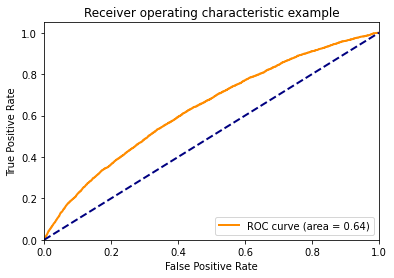

In [37]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

ROC_AUC примерно равен 0.64. Это говорит о том, что предсказаний даются не рандомно. Точность правильного прогноза 96% еще ничего не говорит о правильности работы алгоритмов. Roc-Auc показывает, что алгоритм работает далеко не идеально

Хотя точность правильного прогноза 96%, это не говорит о хорошем качестве нашей модели,у нас всего y_test = 1 поряка 3%. 

Постройте precision-recall кривую на тестовой выборке. Что вы можете по ней сказать?

In [98]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm, datasets
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
average_precision = average_precision_score(y_test, y_score)

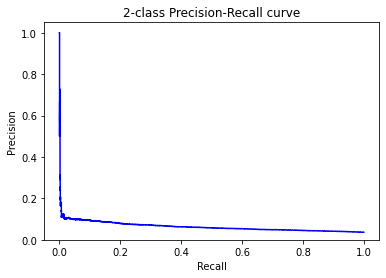

In [100]:
import matplotlib.pyplot as plt
plt.figure()
precision, recall, third = precision_recall_curve(y_test, y_score_pr[:,1])
plt.plot(recall, precision, color = 'blue')
#plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('2-class Precision-Recall curve')
plt.show()

У нас есть алгоритм, который определяет вероятность обращения клиента по страховому случаю, но мы хотим использовать этот алгоритм, чтобы отказывать клиентам в обслуживании в страховой. Для этого нам нужны бинарные предсказания алгоритма. Давайте искать этот порог для получения бинарных предсказаний.

**Задание 11.**

**(0.5 балла)**

Предположим, что нам надо подобрать порог такой, чтобы среди наших положителных предсказаний 95\% действительно обратились бы по страховому случаю. Подберите соответствующий порог, оцените на нём precision, recall. Скажите, какой части потенциальных клиентов мы откажем?

In [104]:
len(third)

118898

In [180]:
third[-2]

0.4832481782815101

In [106]:
len(precision)

118899

In [178]:
#third

In [176]:
#y_score_pr[:, 1]

In [177]:
#precision

In [181]:
vec = np.zeros(len(y_score_pr))

In [205]:
vec

array([0., 0., 0., ..., 0., 0., 0.])

In [151]:
len(third)

118898

In [212]:
vec = np.zeros(len(y_score_pr))
vec[y_score_pr[:, 1] >= third[-2]] = 1

In [213]:
vec

array([0., 0., 0., ..., 0., 0., 0.])

In [214]:
sum(y_test[vec == 1]) / len(y_test[vec == 1])

1.0

In [215]:
vec = np.zeros(len(y_score_pr))
vec[y_score_pr[:, 1] >= third[-3]] = 1

In [216]:
sum(y_test[vec == 1]) / len(y_test[vec == 1])

0.6666666666666666

подобрали порог такой, чтобы вероятность была выше 0.95. видно, что -3 вектор уже не подходит, берем второй

In [232]:
#precision

In [228]:
precision[-2]

1.0

In [224]:
recall[-2]

0.00023142791020597085

получилась высокая точность, но малекая полнота

посмотрим скольким клиентам мы откажем

In [238]:
vec = np.zeros(len(y_score_pr))
vec[y_score_pr[:, 1] >= third[-2]] = 1

In [239]:
sum(vec)

2.0

получается, что мы откажем двум потенциальным клиентам (потому что на них мы точно потеряем деньги)

**Задание 12.** Найдите такой порог, при котором наш баланс (разница между доходами и расходами на группе клиентов, которым мы отказали) неотрицательный.

**(1 балл)**

Пусть на каждом клиенте, который обратился в нашу страховую, мы теряем 100000, а на клиенте, который не обратился в страховую, мы зарабатываем 5000.

возьмем порог из предыдущего пункта и посмотрим на это y_test

In [233]:
vec = np.zeros(len(y_score_pr))
vec[y_score_pr[:, 1] >= third[-2]] = 1

In [240]:
y_test[vec == 1]

array([1, 1], dtype=int64)

In [247]:
summ = 100000 * sum(y_test[vec == 1] == 1)
#summ

In [248]:
razn = 5000 * sum(y_test[vec == 1] == 0)
#razn

In [249]:
summ - razn 

200000

таким образом, взяв такой порог, мы сэкономим себе 200.000 

**А на каком значение порога это разнциа максимальна? Скольким клиентам мы отказали в обслуживании?**

In [265]:
len(third) 

118898

In [268]:
res = 0
reject = 0
l = len(third)
for i in range(l):
    vec = np.zeros(len(y_score_pr))
    vec[y_score_pr[:, 1] >= third[i]] = 1
    summ = 100000 * sum(y_test[vec == 1] == 1)
    razn = 5000 * sum(y_test[vec == 1] == 0)
    if res <  summ - razn:
        res = summ - razn
        reject = sum(vec)
    if i % 10000 == 0:
        print('i am working')

i am working
i am working
i am working
i am working
i am working
i am working
i am working
i am working
i am working
i am working
i am working
i am working


время мы не замеряли, но работает функция долго

In [269]:
res

46520000

In [270]:
reject

20999.0

**таким образом мы отказали почти 21000 человек, и заработали (не потеряли) 46 520 000 рублей, большие деньги!**

максимальная оценка 10 + 0.5 доп баллов